In [47]:
import osmnx as ox
ox.citation()

@article{boeing_osmnx_2017,
    title = {{OSMnx}: {New} {Methods} for {Acquiring}, {Constructing}, {Analyzing}, and {Visualizing} {Complex} {Street} {Networks}},
    volume = {65},
    doi = {10.1016/j.compenvurbsys.2017.05.004},
    number = {126-139},
    journal = {Computers, Environment and Urban Systems},
    author = {Boeing, Geoff},
    year = {2017},
    pages = {126--139}
}


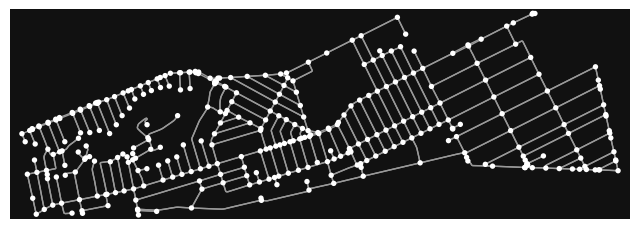

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [48]:
kensington_graph = ox.graph_from_place('Kensington, City of Johannesburg, South Africa', network_type="drive")
ox.plot_graph(kensington_graph)

In [49]:
# Prepare data
data = []
for _, _, _, ddata in kensington_graph.edges(keys=True, data=True): # added ww
    data.append(ddata)
print(len(data))

data


872


[{'osmid': 87361206,
  'lanes': '4',
  'ref': 'R24',
  'name': 'Albertina Sisulu Road',
  'highway': 'primary',
  'maxspeed': '60',
  'oneway': False,
  'reversed': False,
  'length': 45.163},
 {'osmid': 87361206,
  'lanes': '4',
  'ref': 'R24',
  'name': 'Albertina Sisulu Road',
  'highway': 'primary',
  'maxspeed': '60',
  'oneway': False,
  'reversed': True,
  'length': 40.507},
 {'osmid': 26372461,
  'lanes': '2',
  'name': 'Cavan Street',
  'highway': 'residential',
  'oneway': False,
  'reversed': True,
  'length': 88.156,
  'geometry': <LINESTRING (28.085 -26.191, 28.085 -26.192, 28.085 -26.192)>},
 {'osmid': 23060545,
  'lanes': '2',
  'name': '1st Street',
  'highway': 'residential',
  'oneway': False,
  'reversed': False,
  'length': 7.771},
 {'osmid': [765781197, 767333415],
  'oneway': True,
  'lanes': '2',
  'ref': 'R24',
  'name': 'Albertina Sisulu Road',
  'highway': 'primary',
  'maxspeed': '60',
  'reversed': False,
  'length': 31.393,
  'geometry': <LINESTRING (28.077

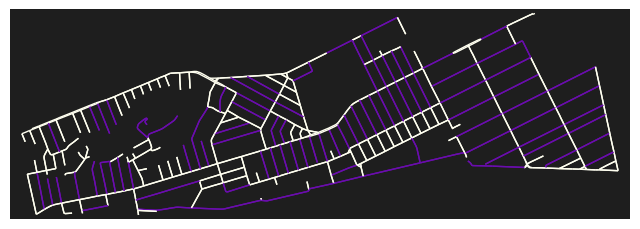

In [51]:
# Define colors according to length of streets
roadCols = []

for item in data:
    if "length" in item.keys():
        if item["length"] <= 200:
            color = "#FFFFF0"             
        elif 200 < item["length"] <= 1000:
            color = "#6a0dad"  
        else:
            color = "#00FFFF"
    else:
        color = "#FFFFFF"         
    roadCols.append(color)

#Plot 
bgcolor = "#1e1e1e"
fig, ax = ox.plot_graph(kensington_graph, node_size=0, 
                        dpi = 100,bgcolor = bgcolor,
                        save = False, edge_color=roadCols,
                        edge_linewidth=1, edge_alpha=1)
fig.tight_layout(pad=0)
fig.savefig("stack.jpg", dpi=100, bbox_inches='tight', format="jpg", 
            facecolor=fig.get_facecolor(), transparent=False)

In [59]:
kensington_gdf = ox.graph_to_gdfs(kensington_graph, nodes=False)
print(len(kensington_gdf))
kensington_gdf.head()

872


osmid lanes  ref  \
u        v          key                                      
26417799 305730224  0                  87361206     4  R24   
         288933063  0                  87361206     4  R24   
         288933328  0                  26372461     2  NaN   
26417800 7151979247 0                  23060545     2  NaN   
         7164510312 0    [765781197, 767333415]     2  R24   

                                          name      highway maxspeed  oneway  \
u        v          key                                                        
26417799 305730224  0    Albertina Sisulu Road      primary       60   False   
         288933063  0    Albertina Sisulu Road      primary       60   False   
         288933328  0             Cavan Street  residential      NaN   False   
26417800 7151979247 0               1st Street  residential      NaN   False   
         7164510312 0    Albertina Sisulu Road      primary       60    True   

                        reversed  length  \
u        v          key                    
26417799 305730224  0      False  45.163   
         288933063  0       True  40.507   
         288933328  0       True  88.156   
26417800 7151979247 0      False   7.771   
         7164510312 0      False  31.393   

                                                                  geometry  
u        v          key                                                     
26417799 305730224  0    LINESTRING (28.08472 -26.19144, 28.08513 -26.1...  
         288933063  0    LINESTRING (28.08472 -26.19144, 28.08434 -26.1...  
         288933328  0    LINESTRING (28.08472 -26.19144, 28.08491 -26.1...  
26417800 7151979247 0    LINESTRING (28.07650 -26.19444, 28.07647 -26.1...  
         7164510312 0    LINESTRING (28.07650 -26.19444, 28.07638 -26.1...

In [74]:
def modify_street(x):
    if "length" in x.keys():
        if x["length"] <= 200:
            x_color = "#FFFFF0"             
        elif 200 < x["length"] <= 1000:
            x_color = "#6a0dad"  
        else:
            x_color = "#00FFFF"
    else:
        x_color = "#FFFFFF"   
    x["road_color"] = x_color
    return x
    

In [75]:
kensington_gdf = kensington_gdf.apply(lambda x: modify_street(x), axis=1)
kensington_gdf

osmid lanes  ref  \
u           v           key                                      
26417799    305730224   0                  87361206     4  R24   
            288933063   0                  87361206     4  R24   
            288933328   0                  26372461     2  NaN   
26417800    7151979247  0                  23060545     2  NaN   
            7164510312  0    [765781197, 767333415]     2  R24   
...                                             ...   ...  ...   
9787389627  9787389622  0                1065781353   NaN  NaN   
10956601309 10956601310 0                1179649581   NaN  NaN   
10956601310 390371867   0                  34036038     2  NaN   
            10956601309 0                1179649581   NaN  NaN   
            390036534   0                  34036038     2  NaN   

                                              name      highway maxspeed  \
u           v           key                                                
26417799    305730224   0    Albertina Sisulu Road      primary       60   
            288933063   0    Albertina Sisulu Road      primary       60   
            288933328   0             Cavan Street  residential      NaN   
26417800    7151979247  0               1st Street  residential      NaN   
            7164510312  0    Albertina Sisulu Road      primary       60   
...                                            ...          ...      ...   
9787389627  9787389622  0                      NaN  residential      NaN   
10956601309 10956601310 0                      NaN  residential      NaN   
10956601310 390371867   0              Ernest Road  residential      NaN   
            10956601309 0                      NaN  residential      NaN   
            390036534   0              Ernest Road  residential      NaN   

                             oneway reversed  length  \
u           v           key                            
26417799    305730224   0     False    False  45.163   
            288933063   0     False     True  40.507   
            288933328   0     False     True  88.156   
26417800    7151979247  0     False    False   7.771   
            7164510312  0      True    False  31.393   
...                             ...      ...     ...   
9787389627  9787389622  0     False    False  68.785   
10956601309 10956601310 0     False     True  68.806   
10956601310 390371867   0     False     True  54.698   
            10956601309 0     False    False  68.806   
            390036534   0     False    False  56.042   

                                                                      geometry  \
u           v           key                                                      
26417799    305730224   0    LINESTRING (28.08472 -26.19144, 28.08513 -26.1...   
            288933063   0    LINESTRING (28.08472 -26.19144, 28.08434 -26.1...   
            288933328   0    LINESTRING (28.08472 -26.19144, 28.08491 -26.1...   
26417800    7151979247  0    LINESTRING (28.07650 -26.19444, 28.07647 -26.1...   
            7164510312  0    LINESTRING (28.07650 -26.19444, 28.07638 -26.1...   
...                                                                        ...   
9787389627  9787389622  0    LINESTRING (28.10714 -26.19513, 28.10727 -26.1...   
10956601309 10956601310 0    LINESTRING (28.09764 -26.19670, 28.09791 -26.1...   
10956601310 390371867   0    LINESTRING (28.09791 -26.19727, 28.09842 -26.1...   
            10956601309 0    LINESTRING (28.09791 -26.19727, 28.09764 -26.1...   
            390036534   0    LINESTRING (28.09791 -26.19727, 28.09749 -26.1...   

                            road_color  
u           v           key             
26417799    305730224   0      #FFFFF0  
            288933063   0      #FFFFF0  
            288933328   0      #FFFFF0  
26417800    7151979247  0      #FFFFF0  
            7164510312  0      #FFFFF0  
...                                ...  
9787389627  9787389622  0      #FFFFF0  
10956601309 10956601310 0      #F

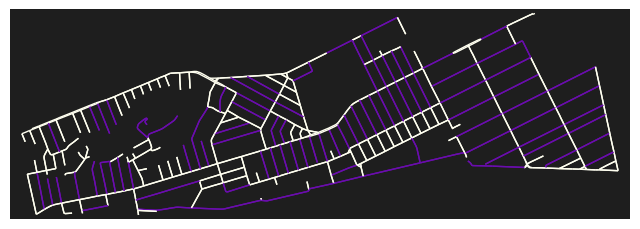

In [76]:
#Plot 
bgcolor = "#1e1e1e"
fig, ax = ox.plot_graph(kensington_graph, node_size=0, 
                        dpi = 100,bgcolor = bgcolor,
                        save = False, edge_color=kensington_gdf["road_color"],
                        edge_linewidth=1, edge_alpha=1)
fig.tight_layout(pad=0)
fig.savefig("stack.jpg", dpi=100, bbox_inches='tight', format="jpg", 
            facecolor=fig.get_facecolor(), transparent=False)